# Julian's PXP Model Compression

import PXP model from Julian's code, set up qc, target mpo, optimise with respect to fidelity with AQC-Unitary add-on for baseline

Baseline test - AQC Unitary ---> done, working, to test functionality of compressed circuit

In [2]:
import jax
import jax.numpy as jnp

# jax.config.update("jax_disable_jit", True)

jax.config.update("jax_enable_x64", True)

method = 'AQC-unitary'

In [3]:
# Build first order Trotterised PXP model from Julian's code
from mpo_lib.models.pxp_model import PXPModel1D
from mpo_lib.circuit.brickwall import BrickwallCircuit

num_sites = 45
num_steps = 7
final_time = 0.3

model_first_order = PXPModel1D.first_order(num_sites, final_time, num_steps)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

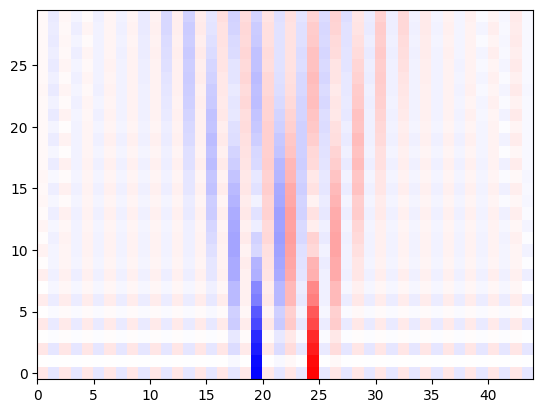

In [4]:
from ropt_aqc.pxp_model import test_magnetisation_evolution

time_steps=30
binary = '101010101010101010100101001010101010101010101'
# binary = '10101010100101010101'
# binary = '100101'

state_quimb = test_magnetisation_evolution(binary, num_sites, num_steps, time_steps)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

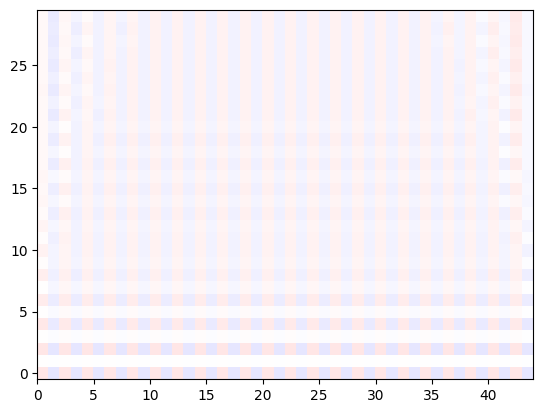

In [5]:
from ropt_aqc.pxp_model import test_magnetisation_evolution

time_steps=30
binary_vac = '101010101010101010101010101010101010101010101'
# binary = '10101010100101010101'
# binary = '100101'

state_quimb_vac = test_magnetisation_evolution(binary_vac, num_sites, num_steps, time_steps)

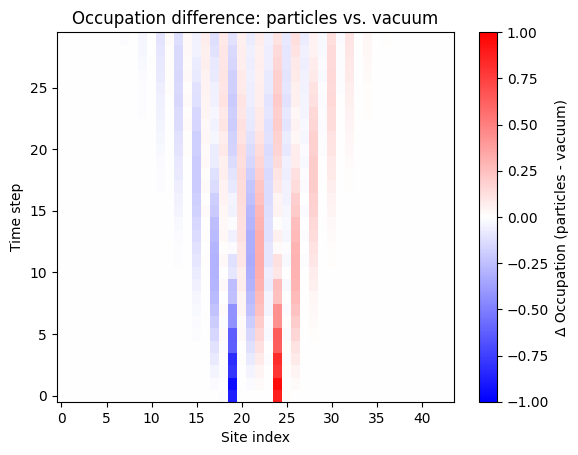

In [6]:
import matplotlib.pyplot as plt
import numpy as np

mag_diff = state_quimb - state_quimb_vac

occupation_diff = np.zeros((time_steps, num_sites-1))
for i in range(num_sites-1):
    occupation_diff[:, i] = (-1)**i * 0.5 * (mag_diff[:, i] + mag_diff[:, i+1])

plt.figure(figsize=(6.4, 4.8))
plt.pcolor(
    np.arange(occupation_diff.shape[1]),
    np.arange(time_steps),
    occupation_diff,
    cmap='bwr', vmin=-1.0, vmax=1.0, shading='nearest'
)
plt.colorbar(label='Δ Occupation (particles - vacuum)')
plt.xlabel("Site index")
plt.ylabel("Time step")
plt.title("Occupation difference: particles vs. vacuum")
plt.show()


In [7]:
from ropt_aqc.pxp_model import name_layered_gates

layered_gates = BrickwallCircuit.to_layered_gate_list(model_first_order)
named_layered_gates = name_layered_gates(layered_gates)
print(f"Layered gates:", named_layered_gates)

Layered gates: [[(array([[[[ 0.9999426+0.j        ,  0.       +0.j        ],
         [ 0.       -0.01071408j,  0.       +0.j        ]],

        [[ 0.       +0.j        ,  0.9999426+0.j        ],
         [ 0.       +0.j        ,  0.       +0.01071408j]]],


       [[[ 0.       -0.01071408j,  0.       +0.j        ],
         [ 0.9999426+0.j        ,  0.       +0.j        ]],

        [[ 0.       +0.j        ,  0.       -0.01071408j],
         [ 0.       +0.j        , -0.9999426+0.j        ]]]]), (np.int64(0), np.int64(1)), 'G_L0_G0'), (array([[[[ 0.99998565+0.j        ,  0.        +0.j        ],
         [ 0.        -0.00535712j,  0.        +0.j        ]],

        [[ 0.        +0.j        ,  0.99998565+0.j        ],
         [ 0.        +0.j        ,  0.        +0.00535712j]]],


       [[[ 0.        -0.00535712j,  0.        +0.j        ],
         [ 0.99998565+0.j        ,  0.        +0.j        ]],

        [[ 0.        +0.j        ,  0.        -0.00535712j],
         [ 0.        +

In [8]:
from ropt_aqc.circuit_building import remap_layered_gate_indices, transform_layered_gates_to_qc_with_names

layered_gates_remapped = remap_layered_gate_indices(named_layered_gates, num_sites, qubit_direction="left-to-right")
remapped_circuit = transform_layered_gates_to_qc_with_names(num_sites, layered_gates_remapped)
# remapped_circuit.draw('mpl')

In [9]:
original_depth = remapped_circuit.depth()
print(original_depth)

63


In [10]:
from qiskit import transpile
transpiled_circuit = transpile(remapped_circuit, basis_gates=['cx', 'rz', 'sx'], optimization_level=3)

In [11]:
from ropt_aqc.pxp_model import test_magnetisation_qiskit

# state_qiskit = test_magnetisation_qiskit(num_sites, binary, time_steps, layered_gates_remapped=layered_gates_remapped)

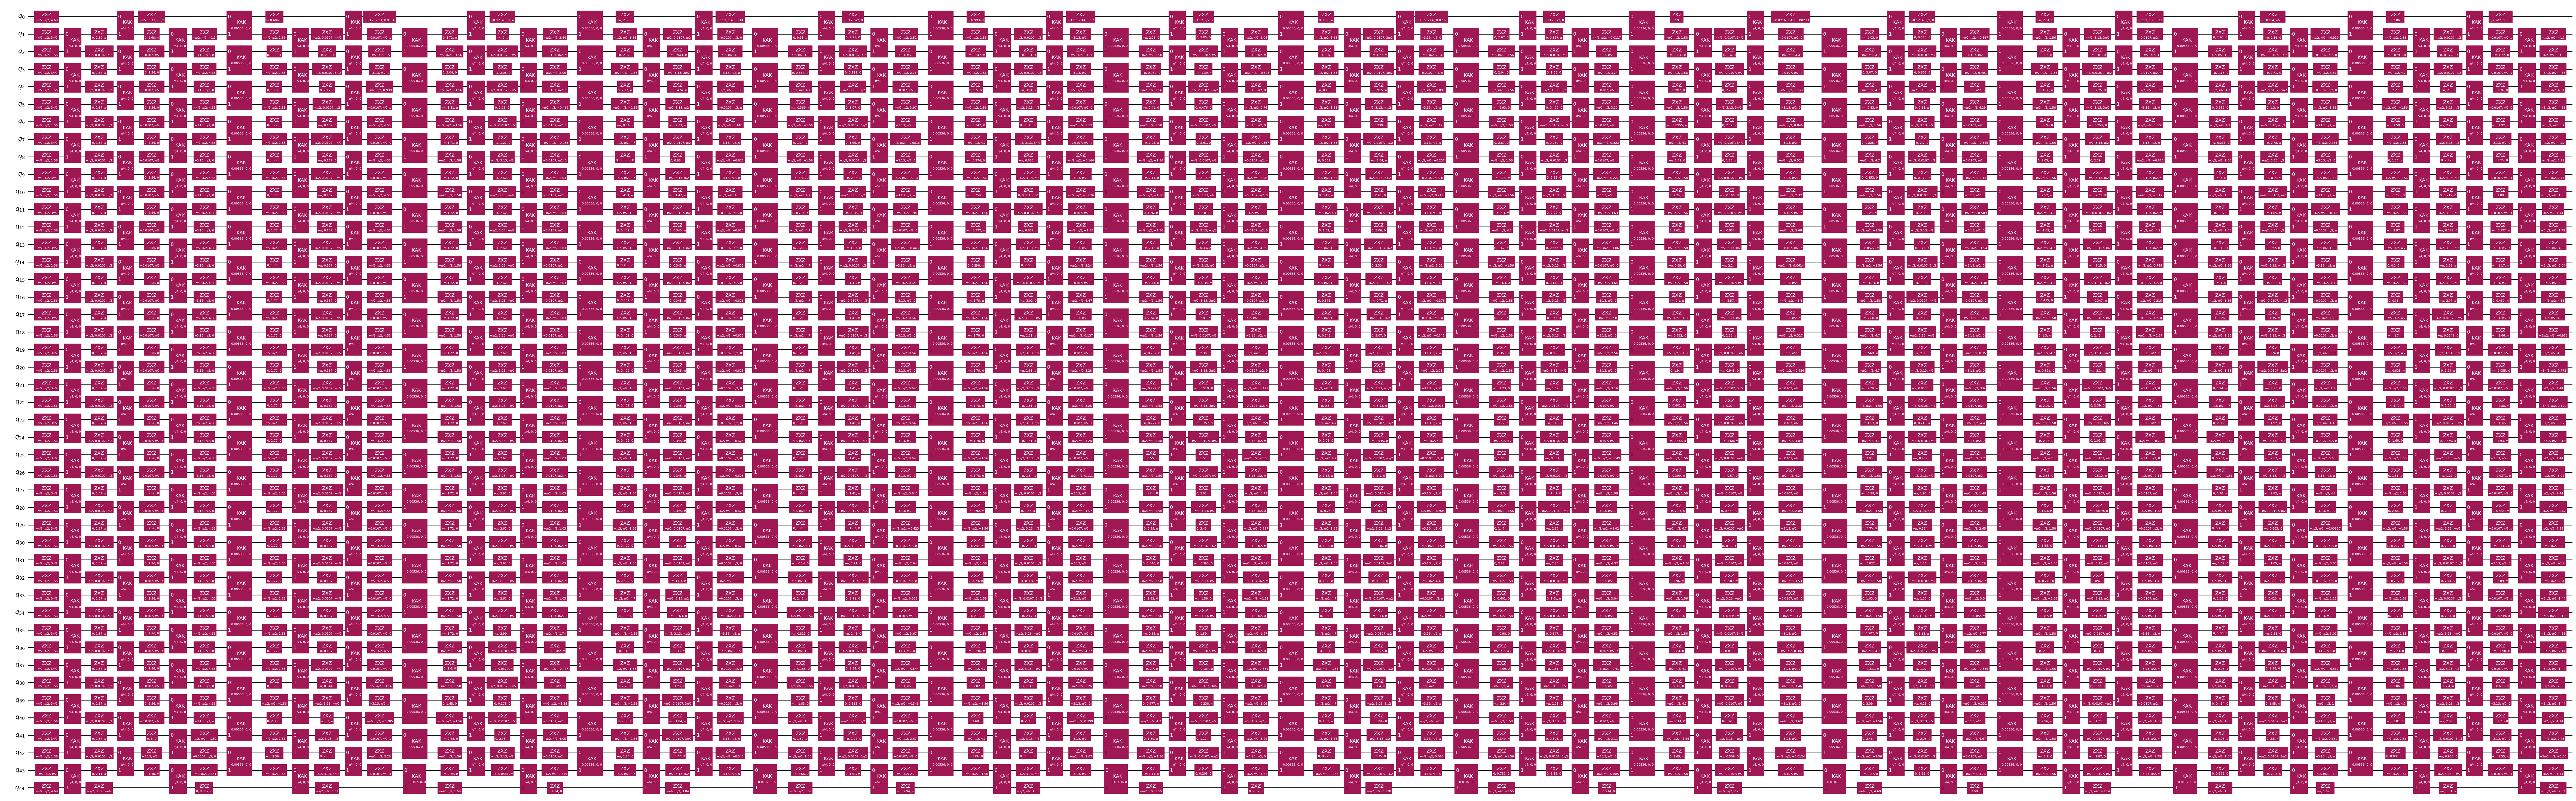

In [12]:
# generate ansatz from circuit
from qiskit_addon_aqc_tensor import generate_ansatz_from_circuit

aqc_ansatz, aqc_initial_parameters = generate_ansatz_from_circuit(
    remapped_circuit, parameter_name="x"
)
aqc_ansatz_original = aqc_ansatz.assign_parameters(aqc_initial_parameters)
aqc_ansatz_original.draw("mpl", fold=-1)
# aqc_ansatz_original.draw("mpl").savefig('Figures/initial_circuit_AQC-u_PXP_1step.pdf')

In [13]:
initial_aqc_depth = aqc_ansatz.depth()
print(initial_aqc_depth)

87


  0%|          | 0/30 [00:00<?, ?it/s]

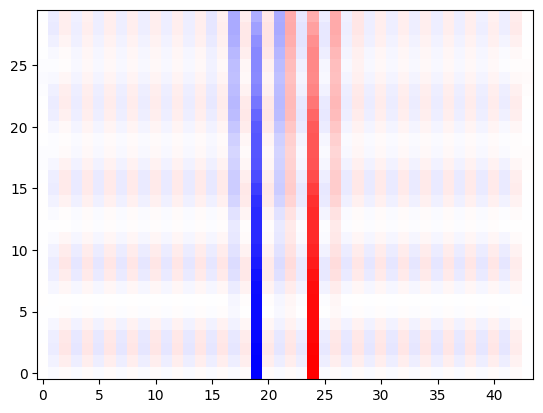

In [14]:
from ropt_aqc.pxp_model import convert_qiskit_layers_to_gate_tensors

state_qiskit = test_magnetisation_qiskit(num_sites, binary, time_steps, qc=remapped_circuit)

In [15]:
from ropt_aqc.pxp_model import pxp_hamiltonian_sparse

hamiltonian = pxp_hamiltonian_sparse(num_sites)
print(hamiltonian)

SparsePauliOp(['XIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'XIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'XZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'XZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IXZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'ZXZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IZXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIXZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IZXZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIXZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZXZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZXIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIXZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZXZIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIII

  0%|          | 0/30 [00:00<?, ?it/s]

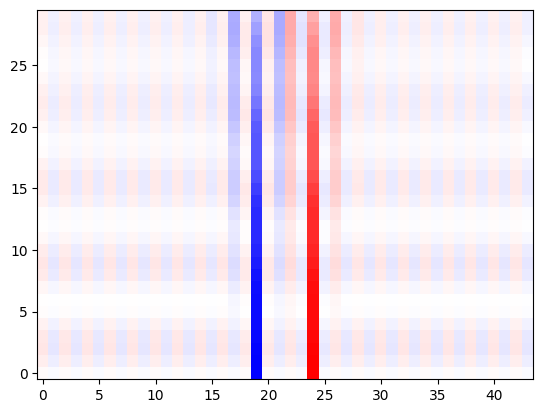

In [16]:
state_initial = test_magnetisation_qiskit(num_sites, binary, time_steps, qc=aqc_ansatz_original)

This single Trotter step circuit will be repeated 256 times:


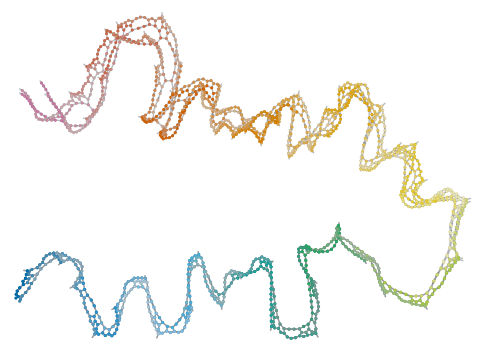

max_tdiff=2.11e-08:   1%|1         | 1/100 [00:01<01:50,  1.12s/it]


    │3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3    
... ●─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─ ...
    │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │     
                                 ...                                  
    │3│3│3│3│3│3│3│3│3│
    <─<─<─<─<─<─<─<─<─<
    │ │ │ │ │ │ │ │ │ │
    │3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3    
... ●─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─ ...
    │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │     
                                 ...                                  
    │3│3│3│3│3│3│3│3│3│
    <─<─<─<─<─<─<─<─<─<
    │ │ │ │ │ │ │ │ │ │
    │3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3│3    
... ●─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─<─ ...
    │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │     
   

In [17]:
from ropt_aqc.pxp_model import generate_reference_mpo

aqc_target_log2_num_trotter_steps = 8
aqc_target_mpo, aqc_target_step_circuit, target_circ = generate_reference_mpo(final_time, aqc_target_log2_num_trotter_steps, hamiltonian)

In [18]:
import pickle

with open("reference_mpo_data.pkl", "wb") as f:
    pickle.dump({
        "aqc_target_mpo": aqc_target_mpo,
        "aqc_target_step_circuit": aqc_target_step_circuit,
        "target_circ": target_circ,
    }, f)


In [25]:
with open("reference_mpo_data.pkl", "rb") as f:
    data = pickle.load(f)

aqc_target_mpo = data["aqc_target_mpo"]
aqc_target_step_circuit = data["aqc_target_step_circuit"]
target_circ = data["target_circ"]

In [26]:
bond_dims = [t.shape[1] for t in aqc_target_mpo.tensors[:-1]]
print(f"Target MPO bond dims: {bond_dims}")
print(f"Max bond dim: {max(bond_dims)}")

Target MPO bond dims: [2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Max bond dim: 4


In [27]:
# set up quimb
import quimb.tensor as qtn
from functools import partial
# import quimb.tensor
# from qiskit_addon_aqc_tensor.simulation.quimb import QuimbSimulator

# simulator_settings = QuimbSimulator(
#     partial(quimb.tensor.Circuit, gate_contract="split-gate"),
#     autodiff_backend="explicit", 
# )

from qiskit_addon_aqc_tensor.simulation.quimb import QuimbSimulator
simulator_settings = QuimbSimulator(
    quimb_circuit_factory=partial(qtn.CircuitMPS, gate_contract="split-gate"),
    autodiff_backend="explicit",
    progbar=False,
)

In [28]:
print("Quimb contraction settings:", simulator_settings.kwargs if hasattr(simulator_settings, 'kwargs') else simulator_settings)


Quimb contraction settings: QuimbSimulator(quimb_circuit_factory=functools.partial(<class 'quimb.tensor.circuit.CircuitMPS'>, gate_contract='split-gate'), autodiff_backend='explicit', progbar=False)


In [29]:
from scipy.optimize import OptimizeResult
import numpy as np

def adam(
    fun,
    x0,
    jac,
    args=(),
    learning_rate=1e-3,
    beta1=0.9,
    beta2=0.999,
    eps=1e-8,
    startiter=0,
    maxiter=100_000,
    callback=None,
    **kwargs,
):
    """``scipy.optimize.minimize`` compatible implementation of ADAM -
    [http://arxiv.org/pdf/1412.6980.pdf].
    Adapted from https://github.com/HIPS/autograd/blob/master/autograd/misc/optimizers.py.
    """
    x = x0
    m = np.zeros_like(x)
    v = np.zeros_like(x)

    for i in range(startiter, startiter + maxiter):
        val, g = fun(x)

        intermediate_result = OptimizeResult(
            x=x, fun=val, jac=g, nit=i, nfev=i, success=True, message="Intermediate result"
        )
        if callback is not None:
            try:
                callback(intermediate_result)
            except StopIteration:
                return OptimizeResult(
                    x=x, fun=val, jac=g, nit=i, nfev=i, success=True, status=99,
                    message="Desired cost reached early"
                )

        m = (1 - beta1) * g + beta1 * m  # first  moment estimate.
        v = (1 - beta2) * (g**2) + beta2 * v  # second moment estimate.
        mhat = m / (1 - beta1**(i + 1))  # bias correction.
        vhat = v / (1 - beta2**(i + 1))
        x = x - learning_rate * mhat / (np.sqrt(vhat) + eps)

    return OptimizeResult(
        x=x, fun=val, jac=g, nit=i + 1, nfev=i + 1, success=True, status=1,
        message="Max iterations reached"
    )

# Complete optimisation of ansatz

In [30]:
# Optimise with respect to fidelity
from scipy.optimize import OptimizeResult, minimize

from qiskit_addon_aqc_tensor.objective import MaximizeUnitaryFidelity

objective = MaximizeUnitaryFidelity(target_circ, aqc_ansatz, simulator_settings)
print(type(objective._target_tensornetwork))
stopping_point = 1e-4

# def my_loss_function(*args):
#     val, grad = objective.loss_function(*args)

#     # Ensure val is a float (not quimb.Tensor or jax.Array)
#     val = float(val) if hasattr(val, "item") else val
#     grad = jnp.asarray(grad)

#     print(f"Evaluating loss function: {1 - val:.8}")
#     return val, grad

def my_loss_function(x):
    val, grad = objective.loss_function(x)
    print(f"Evaluating fidelity: {1 - val:.8f}")
    return float(val), grad


def callback(intermediate_result: OptimizeResult):
    print(f"Intermediate result: Fidelity {1 - intermediate_result.fun:.8}")
    if intermediate_result.fun < stopping_point:
        # Good enough for now
        raise StopIteration


result = minimize(
    my_loss_function,
    aqc_initial_parameters,
    # method="L-BFGS-B",
    method = adam,
    jac=False,
    options={"maxiter": 100},
    callback=callback,
)

if result.status not in (
    0,
    1,
    99,
):  # 0 => success; 1 => max iterations reached; 99 => early termination via StopIteration
    raise RuntimeError(f"Optimization failed: {result.message} (status={result.status})")

print(f"Done after {result.nit} iterations.")
aqc_final_parameters = result.x

<class 'quimb.tensor.circuit.CircuitMPS'>


: 

In [ ]:
# optimised circuit 
aqc_optimised_block = aqc_ansatz.assign_parameters(aqc_final_parameters)
print("=== Complete Optimised Circuit ===")
aqc_optimised_block.draw("mpl")

In [ ]:
optimised_aqc_depth = aqc_optimised_block.depth()
print(optimised_aqc_depth)

In [ ]:
layered_gates_optimised = convert_qiskit_layers_to_gate_tensors(aqc_optimised_block)
state_optimised = test_magnetisation_qiskit(num_sites, binary, time_steps, layered_gates_optimised)

In [ ]:
from ropt_aqc.pxp_model import calcualte_initial_final_Frobenius

initial_fidelity, final_fidelity = calcualte_initial_final_Frobenius(num_sites, aqc_target_step_circuit, aqc_target_log2_num_trotter_steps, aqc_optimised_block, initial_qc=remapped_circuit)

# Forward Optimisation of Ansatz

In [ ]:
# Now slice and compress
from ropt_aqc.comparison_methods import compress_AQC_unitary

N_vals = range(1, initial_aqc_depth+1)
df, aqc_ansatz, aqc_final_parameters = compress_AQC_unitary(aqc_ansatz, aqc_initial_parameters, aqc_target_mpo, N_vals, simulator_settings, num_steps)

In [ ]:
# Optimise with respect to fidelity
from scipy.optimize import OptimizeResult, minimize

from qiskit_addon_aqc_tensor.objective import MaximizeUnitaryFidelity

objective = MaximizeUnitaryFidelity(aqc_target_mpo, aqc_ansatz, simulator_settings)

stopping_point = 1e-4

# def my_loss_function(*args):
#     val, grad = objective.loss_function(*args)

#     # Ensure val is a float (not quimb.Tensor or jax.Array)
#     val = float(val) if hasattr(val, "item") else val
#     grad = jnp.asarray(grad)

#     print(f"Evaluating loss function: {1 - val:.8}")
#     return val, grad

def my_loss_function(x):
    val, grad = objective.loss_function(x)
    print(f"Evaluating fidelity: {1 - val:.8f}")
    return float(val), np.array(grad)


def callback(intermediate_result: OptimizeResult):
    print(f"Intermediate result: Fidelity {1 - intermediate_result.fun:.8}")
    if intermediate_result.fun < stopping_point:
        # Good enough for now
        raise StopIteration


result = minimize(
    my_loss_function,
    aqc_initial_parameters,
    # method="L-BFGS-B",
    method = adam,
    jac=False,
    options={"maxiter": 100},
    callback=callback,
)

if result.status not in (
    0,
    1,
    99,
):  # 0 => success; 1 => max iterations reached; 99 => early termination via StopIteration
    raise RuntimeError(f"Optimization failed: {result.message} (status={result.status})")

print(f"Done after {result.nit} iterations.")
aqc_final_parameters = result.x

In [ ]:
import pandas as pd
file_path_PXP=f'/Users/aag/Documents/ropt-aqc/PXP/results/AQC_unitary_PXP_results_{num_sites}q_{final_time}_{num_steps}steps_forward.csv'
df.to_csv(file_path_PXP, index=False, header=True)
# df.to_csv(file_path_PXP, index=False, mode="a", header=False)

In [ ]:
from ropt_aqc.brickwall_opt import plot_fidelity

method = 'AQC-unitary'
elbow_N, plateau_N = plot_fidelity(df, 'Final_fidelity', final_time, 1e-3, method, 'PXP', save_path=True)

In [ ]:
# Compress circuit
from ropt_aqc.comparison_methods import compress_AQC_unitary

# N_vals = [int(plateau_N)]
N_vals = [4]
df_compressed, aqc_ansatz_compressed, aqc_final_parameters_compressed = compress_AQC_unitary(aqc_ansatz, aqc_initial_parameters, aqc_target_mpo, N_vals, simulator_settings, num_steps)

In [ ]:
from qiskit import transpile

print(aqc_ansatz_compressed.depth())
transpiled_circuit_aqc = transpile(aqc_ansatz_compressed, basis_gates=['cx', 'rz', 'sx'], optimization_level=3)
print(transpiled_circuit_aqc.depth())

In [ ]:
print("=== Compressed Optimised Circuit ===")
print(aqc_ansatz_compressed.depth())
param_binding = {param: value for param, value in zip(aqc_ansatz_compressed.parameters, aqc_final_parameters_compressed)}
aqc_optimised_compressed = aqc_ansatz_compressed.assign_parameters(param_binding)

aqc_optimised_compressed.draw("mpl")
# aqc_optimised_compressed.draw("mpl").savefig('optimised_circuit_hybrid-AQC-u_PXP.pdf')
# print(aqc_optimised_compressed.depth())

In [ ]:
print("\n=== Compressed Optimised Parameters ===")
import pandas as pd
for param, value in zip(aqc_ansatz_compressed.parameters, aqc_final_parameters_compressed):
    print(f"{param}: {value:.6f}")

df_params = pd.DataFrame({'parameters': aqc_final_parameters_compressed})
df_params.to_csv('aqc_unitary_parameters_Ising.csv', index=False)

In [ ]:
print(f"Number of parameters in ansatz: {len(aqc_ansatz_compressed.parameters)}")
print(f"Physical depth of compressed circuit: {aqc_optimised_compressed.depth()}")
print(f"Transpiled depth of compressed circuit: {transpiled_circuit_aqc.depth()}")
print(f"Compression ratio: {initial_aqc_depth / aqc_optimised_compressed.depth()}")
print(f"Transpiled Compression ratio: {transpiled_circuit.depth() / transpiled_circuit_aqc.depth()}")

In [ ]:
layered_gates_compressed = convert_qiskit_layers_to_gate_tensors(aqc_optimised_compressed)
state_compressed = test_magnetisation_qiskit(num_sites, binary, time_steps, layered_gates_compressed)

# Reverse Compression Ansatz

In [ ]:
from ropt_aqc.comparison_methods import compress_AQC_unitary_reverse

df, aqc_truncated, aqc_final_parameters_reverse = compress_AQC_unitary_reverse(aqc_ansatz, aqc_initial_parameters, initial_aqc_depth, target_circ, simulator_settings, fidelity_threshold=0.97)

In [ ]:
from qiskit import transpile

print(aqc_truncated.depth())
transpiled_circuit_aqc = transpile(aqc_truncated, basis_gates=['cx', 'rz', 'sx'], optimization_level=3)
print(transpiled_circuit_aqc.depth())

In [ ]:
import pandas as pd
file_path_PXP=f'/Users/aag/Documents/ropt-aqc/PXP/results/AQC_unitary_PXP_results_{num_sites}q_{final_time}_{num_steps}steps_reverse.csv'
df.to_csv(file_path_PXP, index=False, header=True)
# df.to_csv(file_path_PXP, index=False, mode="a", header=False)

In [ ]:
from ropt_aqc.brickwall_opt import plot_fidelity
# df_reverse = df.sort_values("circuit_layers", ascending=True)
method = 'AQC-unitary-reverse'
elbow_N, plateau_N = plot_fidelity(df, 'Final_fidelity', final_time, 1e-3, method, 'PXP', save_path=True)

In [ ]:
print("=== Compressed Optimised Circuit ===")

param_binding = {param: value for param, value in zip(aqc_truncated.parameters, aqc_final_parameters_reverse)}
aqc_optimised_compressed = aqc_truncated.assign_parameters(param_binding)

aqc_optimised_compressed.draw("mpl")
# aqc_optimised_compressed.draw("mpl").savefig('Figures/optimised_circuit_AQC-u_PXP.pdf')

In [ ]:
print(aqc_optimised_compressed.depth())
transpiled_circuit_aqc = transpile(aqc_optimised_compressed, basis_gates=['cx', 'rz', 'sx'], optimization_level=3)
print(transpiled_circuit_aqc.depth())

In [ ]:
from ropt_aqc.pxp_model import calcualte_initial_final_Frobenius

initial_fidelity1, final_fidelity1 = calcualte_initial_final_Frobenius(num_sites, aqc_target_step_circuit, aqc_target_log2_num_trotter_steps, aqc_optimised_compressed, initial_qc=remapped_circuit)

In [ ]:
print("\n=== Compressed Optimised Parameters ===")
import pandas as pd
for param, value in zip(aqc_truncated.parameters, aqc_final_parameters_reverse):
    print(f"{param}: {value:.6f}")

df_params = pd.DataFrame({'parameters': aqc_final_parameters_compressed})
df_params.to_csv('aqc_unitary_parameters_Ising.csv', index=False)

In [ ]:
print(f"Number of parameters in ansatz: {len(aqc_truncated.parameters)}")
print(f"Physical depth of compressed circuit: {aqc_optimised_compressed.depth()}")
print(f"Transpiled depth of compressed circuit: {transpiled_circuit_aqc.depth()}")
print(f"Compression ratio: {initial_aqc_depth / aqc_optimised_compressed.depth()}")
print(f"Transpiled Compression ratio: {transpiled_circuit.depth() / transpiled_circuit_aqc.depth()}")

In [ ]:
layered_gates_compressed = convert_qiskit_layers_to_gate_tensors(aqc_optimised_compressed)
state_compressed = test_magnetisation_qiskit(num_sites, binary, time_steps, layered_gates_compressed)

In [ ]:
# Compress single Trotter step with different n layers 
compressed_circuit_dict = {}

for depth in [5, 6, 7, 8]:
    print(f"\n=== Compressing with {depth} layers ===")
    
    df_compressed, aqc_ansatz_compressed, aqc_initial_parameters_compressed, aqc_final_parameters_compressed = compress_AQC_unitary(
        aqc_ansatz,
        aqc_initial_parameters,
        aqc_target_mpo,
        [depth],  # must be a list
        simulator_settings,
        num_steps
    )

    param_binding = {
        param: value for param, value in zip(aqc_ansatz_compressed.parameters, aqc_final_parameters_compressed)
    }
    aqc_optimised_compressed = aqc_ansatz_compressed.assign_parameters(param_binding)

    # Calculate fidelity for the compressed circuit
    initial_fidelity1, final_fidelity1 = calcualte_initial_final_Frobenius(
        num_sites,
        aqc_target_step_circuit,
        aqc_target_log2_num_trotter_steps,
        aqc_optimised_compressed,
        initial_qc=remapped_circuit
    )

    compressed_depth = aqc_optimised_compressed.depth()
    compression_ratio = original_depth / compressed_depth
    label = f"{depth}-layer (×{compression_ratio:.2f})"

    compressed_circuit_dict[label] = aqc_optimised_compressed

    print(f"Number of parameters: {len(aqc_ansatz_compressed.parameters)}")
    print(f"Compressed depth: {compressed_depth}")
    print(f"Compression ratio: {compression_ratio:.2f}")


In [ ]:
from ropt_aqc.pxp_model import plot_fidelity_decay_multiple_compressed_circuits

time_points, fidelity_dict = plot_fidelity_decay_multiple_compressed_circuits(
    compressed_circuit_dict=compressed_circuit_dict,
    reference_step_circuit=aqc_target_step_circuit,  # single Trotter step circuit used in training
    final_time=final_time,
    num_sites=num_sites,
    trotter_log2_steps=aqc_target_log2_num_trotter_steps,
    max_steps=20
)


In [ ]:
# Compose single step to n steps
from qiskit import QuantumCircuit
qc_total = QuantumCircuit(num_sites)

n= 20
total_time = n * final_time

for _ in range(n):
    qc_total.compose(aqc_optimised_compressed, inplace=True)


In [ ]:
layered_gates_total = convert_qiskit_layers_to_gate_tensors(qc_total)
state_total = test_magnetisation_qiskit(num_sites, binary, time_steps, layered_gates_total)

In [ ]:
from mpo_lib.models.pxp_model import PXPModel1D
from mpo_lib.circuit.brickwall import BrickwallCircuit

num_sites = 6
num_steps = n
final_time = total_time

total_model_first_order = PXPModel1D.first_order(num_sites, final_time, num_steps)


In [ ]:
from mpo_lib.models.pxp_model import test_magnetisation_evolution

time_steps=20

# binary = '101010100101001010101'
binary = '100101'

state_quimb_total = test_magnetisation_evolution(binary, num_sites, num_steps, time_steps)

In [ ]:
layered_gates_total = BrickwallCircuit.to_layered_gate_list(total_model_first_order)
named_layered_gates_total = []

for layer_idx, layer in enumerate(layered_gates_total):
    named_layer = []
    for gate_idx, (gate_tensor, qubits) in enumerate(layer):
        name = f"G_L{layer_idx}_G{gate_idx}"
        named_layer.append((gate_tensor, qubits, name))
        # print(f"{name} -> qubits {qubits}")
    named_layered_gates_total.append(named_layer)

In [ ]:
from ropt_aqc.circuit_building import remap_layered_gate_indices, transform_layered_gates_to_qc_with_names

layered_gates_remapped_total = remap_layered_gate_indices(named_layered_gates_total, num_sites, qubit_direction="left-to-right")
remapped_circuit_total = transform_layered_gates_to_qc_with_names(num_sites, layered_gates_remapped_total)
# remapped_circuit_total.draw('mpl')

In [ ]:
# generate ansatz from circuit
from qiskit_addon_aqc_tensor import generate_ansatz_from_circuit

aqc_ansatz_total, aqc_initial_parameters_total = generate_ansatz_from_circuit(
    remapped_circuit_total, parameter_name="x"
)
aqc_ansatz_original_total = aqc_ansatz_total.assign_parameters(aqc_initial_parameters_total)
aqc_ansatz_original_total.draw("mpl", fold=-1)
# aqc_ansatz_original.draw("mpl").savefig('Figures/initial_circuit_AQC-u_PXP_1step.pdf')

In [ ]:
layered_gates_test = convert_qiskit_layers_to_gate_tensors(remapped_circuit)
state_qiskit = test_magnetisation_qiskit(num_sites, binary, time_steps, layered_gates_test)

In [ ]:
print('Total evolution:', state_total)
print('Ref evolution: ', state_qiskit)